In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime

In [2]:
df = pd.read_csv('csvfile.csv', usecols = ['ANO_BO', 
                                           'NUM_BO', 
                                           'DATAOCORRENCIA',
                                           'HORAOCORRENCIA',
                                           'PERIDOOCORRENCIA', 
                                           'BAIRRO', 'CIDADE', 
                                           'LATITUDE', 
                                           'LONGITUDE', 
                                           'LOGRADOURO', 
                                           'DESCRICAOLOCAL', 
                                           'DESCR_TIPO_VEICULO', 
                                           'DELEGACIA_NOME',
                                           'FLAGRANTE',   
                                           ], 
    encoding='utf-8'
)

In [30]:
df['DATAOCORRENCIA'] = pd.to_datetime(df['DATAOCORRENCIA'], format= '%Y-%m-%d') #%d-%m-%Y')

#strptime(df['DATAOCORRENCIA'], format='%d-%m-%Y')

##### Quantidade de tuplas

In [4]:
before_drop = df.shape[0]
print("Quantidade de tuplas: ",df.shape[0])

Quantidade de tuplas:  9306


##### Remoção de tuplas duplicadas

In [5]:
df.drop_duplicates(subset=['DELEGACIA_NOME', 'ANO_BO', 'NUM_BO'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
after_drop = df.shape[0]
print("Quantidade de tuplas: ",df.shape[0])

Quantidade de tuplas:  4277


In [7]:
df.head()

,ANO_BO,NUM_BO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,DELEGACIA_NOME,DESCR_TIPO_VEICULO
0,2019,10019,2019-12-31,22:30:00,A NOITE,Não,AVENIDA RIACHO DOS MACHADOS,SAO MATEUS,S.PAULO,-23.593903,-46.494643,Via pública,69º D.P. TEOTONIO VILELA,AUTOMOVEL
1,2019,1624930,2019-12-31,21:23:00,A NOITE,Não,RUA CRISTÓVÃO MENDES,JARDIM SAO PAULO(ZONA LESTE),S.PAULO,-23.550116,-46.399410,Via Pública,DELEGACIA ELETRONICA,AUTOMOVEL
2,2020,2,2019-12-31,22:00:00,A NOITE,Não,RUA FRANZ VONACH,JACANA,S.PAULO,-23.456356,-46.574186,Via Pública,DELEGACIA ELETRONICA,AUTOMOVEL
3,2020,5,2019-12-31,21:15:00,A NOITE,Não,RUA CRISTÓVÃO DE OLIVEIRA,JARDIM NOVE DE JULHO,S.PAULO,-23.587612,-46.483828,Via Pública,DELEGACIA ELETRONICA,AUTOMOVEL
4,2019,1624894,2019-12-31,19:00:00,A NOITE,Não,RUA USHIKICHI KAMIYA,TREMEMBE,S.PAULO,-23.441797,-46.588894,Via Pública,DELEGACIA ELETRONICA,AUTOMOVEL


In [8]:
df['HORAOCORRENCIA'].astype('datetime64')


0      2022-01-26 22:30:00
1      2022-01-26 21:23:00
2      2022-01-26 22:00:00
3      2022-01-26 21:15:00
4      2022-01-26 19:00:00
               ...        
4272   2022-01-26 20:30:00
4273   2022-01-26 20:55:00
4274   2022-01-26 22:10:00
4275   2022-01-26 22:15:00
4276   2022-01-26 20:30:00
Name: HORAOCORRENCIA, Length: 4277, dtype: datetime64[ns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ANO_BO              4277 non-null   int64         
 1   NUM_BO              4277 non-null   int64         
 2   DATAOCORRENCIA      4277 non-null   datetime64[ns]
 3   HORAOCORRENCIA      4093 non-null   object        
 4   PERIDOOCORRENCIA    4277 non-null   object        
 5   FLAGRANTE           4277 non-null   object        
 6   LOGRADOURO          4050 non-null   object        
 7   BAIRRO              4270 non-null   object        
 8   CIDADE              4274 non-null   object        
 9   LATITUDE            3958 non-null   float64       
 10  LONGITUDE           3958 non-null   float64       
 11  DESCRICAOLOCAL      4277 non-null   object        
 12  DELEGACIA_NOME      4277 non-null   object        
 13  DESCR_TIPO_VEICULO  3219 non-null   object      

# Análise Exploratia dos Dados

Esta parte trabalho, consiste na utilização de técnicas estatísticas para exploração de dados, bem como de técnicas de visualização de dados, com a finalidade de extrair conhecimento do dataset gerado no trabalho anterior.

### Estimativa de parâmetro (Medida de tendência Central)
Media  |  Mediana  |  Moda

In [10]:
print("Média:", df['NUM_BO'].mean())
print("Mediana:", df['NUM_BO'].median())
print("Moda:", df['CIDADE'].mode())

Média: 10221.018704699556
Mediana: 272.0
Moda: 0    S.PAULO
dtype: object


### Estimativa de variabilidade (Medida de dispersão)¶
Variância | Desvio Padrão | Desvio absoluto médio

In [11]:
print("Desvio absoluto médio:", df['NUM_BO'].mad())
print("Variância:", df['NUM_BO'].var())
print("Desvio padrão:", df['NUM_BO'].std())

Desvio absoluto médio: 17453.96381119464
Variância: 2555409874.66709
Desvio padrão: 50551.06205281043


### Menor parte das ocorrencias são flagrante e não em via pública

In [17]:
flagrante = df[df["FLAGRANTE"]=="Sim"].shape[0]
local = df[df["DESCRICAOLOCAL"]=="Via Pública"].shape[0]

In [16]:
#print('Quantidade de ocorrências que é flagrante: ',df[df["DESCRICAOLOCAL"]=="Via Pública"].shape[0])

In [18]:
print('Quantidade de ocorrências que é flagrante: ', flagrante)
print('Quantidade de ocorrências fora da via publica: ', local)

Quantidade de ocorrências que é flagrante:  251
Quantidade de ocorrências fora da via publica:  457


### Tabela de frequência e histograma

In [21]:
import matplotlib.pyplot as plt

In [20]:
df.head()

,ANO_BO,NUM_BO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,DELEGACIA_NOME,DESCR_TIPO_VEICULO
0,2019,10019,2019-12-31,22:30:00,A NOITE,Não,AVENIDA RIACHO DOS MACHADOS,SAO MATEUS,S.PAULO,-23.593903,-46.494643,Via pública,69º D.P. TEOTONIO VILELA,AUTOMOVEL
1,2019,1624930,2019-12-31,21:23:00,A NOITE,Não,RUA CRISTÓVÃO MENDES,JARDIM SAO PAULO(ZONA LESTE),S.PAULO,-23.550116,-46.399410,Via Pública,DELEGACIA ELETRONICA,AUTOMOVEL
2,2020,2,2019-12-31,22:00:00,A NOITE,Não,RUA FRANZ VONACH,JACANA,S.PAULO,-23.456356,-46.574186,Via Pública,DELEGACIA ELETRONICA,AUTOMOVEL
3,2020,5,2019-12-31,21:15:00,A NOITE,Não,RUA CRISTÓVÃO DE OLIVEIRA,JARDIM NOVE DE JULHO,S.PAULO,-23.587612,-46.483828,Via Pública,DELEGACIA ELETRONICA,AUTOMOVEL
4,2019,1624894,2019-12-31,19:00:00,A NOITE,Não,RUA USHIKICHI KAMIYA,TREMEMBE,S.PAULO,-23.441797,-46.588894,Via Pública,DELEGACIA ELETRONICA,AUTOMOVEL


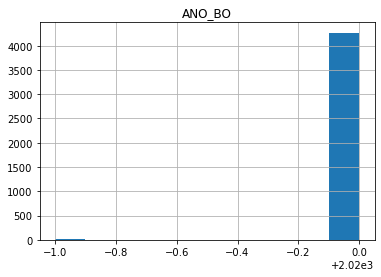

In [28]:
df.hist(column='ANO_BO', bins=10)
plt.show()